In [33]:
pip install pyspellchecker

In [34]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re
import string

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#spaCY
import spacy
from spacy import displacy
spacy.cli.download("en_core_web_sm")
sp = spacy.load("en_core_web_sm")

# Spellcheckers
from spellchecker import SpellChecker #pip install pyspellchecker
from textblob import TextBlob

import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [35]:
print(stopwords.words('arabic'))

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [36]:
def preprocess(text, spellcheck=False, rm_unrelatedData=True, rm_stopwords=True, stem=False, lemmatize=True, rm_punctuations=True, rm_emojis=True):
  text = ' '.join(text.split()) #remove white spaces

  if rm_unrelatedData:
    text = re.sub("`", "'", text) #Replace ` with ' e.g. I`m to I'm
    text = re.sub('@[^\s]+','@user',text) #Remove user names
    #text = re.sub('#[^\s]+','',text)
    text = re.sub('http[^\s]+','',text) #Remove Urls
    #text = re.sub('[^\x00-\x7F]+','', text) #Remove non ASCII characters
    text = re.sub('&[^\s]*;','',text) # Remoe text used in HTML encoding e.g. &amp;
    #text = re.sub("^\d+\s|\s\d+\s|\s\d+$", '', text) #Will remove numbers that are not attached to words
    #text = re.sub(r'\b\d+\b', '', text) #This will only remove digits that are not attached to words preventing the removal of words like h3ll
    text = re.sub(r'\d+', '', text) #Remove digits

  match(spellcheck):
    case 'pyspellchecker':
      try:
        correctedText = []
        missSpelledWords = spell.unknown(text.split()) #To avoid altering acryonyms
        for word in text.split(): # use tokenize method to split the text
          if word in missSpelledWords:
            correctedText.append(spell.correction(word))
          else:
            correctedText.append(word)
        text = ' '.join(correctedText) # join the corrected words with space
      except:
        text = text
    case 'textblob':
      text = str(TextBlob(text).correct())
    case _:
      pass

  match(stem):
    case 'p':
      stems = [PorterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 's':
      stems = [SnowballStemmer(language='arabic').stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case 'l':
      stems = [LancasterStemmer().stem(word) for word in word_tokenize(text)]
      text = ' '.join(stems)
    case _:
      pass


  if rm_stopwords:
    stopNLTK = stopwords.words('arabic')
    stopNLTK.extend(['ان', 'أن', 'انا', 'أنا', 'انها', 'إنها', 'معها', 'مع', 'و', 'هذا', 'مع', 'معه', 'معها', 'عند', 'عندما', 'يا'])
    #stopSP = sp.Defaults.stop_words | {'im', 's', 'ive'} #spaCy defaults stopwrods | custom words
    text = word_tokenize(text)
    #text = [word for word in text if not word.lower() in set(stopwords.words('english'))]
    text = [word for word in text if not word.lower() in set(stopNLTK)]
    text = ' '.join(text)

  if lemmatize:
    text = " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()])
    #text = " ".join([WordNetLemmatizer().lemmatize(word) for word in word_tokenize(text)])

  if rm_punctuations:
    text = text.replace('،', ',')
    text = text.replace('_', ' ')
    text = text.replace('□', '')
    text = text.replace('▯', '')

    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

  if rm_emojis:
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)

    text = emoji_pattern.sub("", text)

  return text

In [37]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Others/Sentiment Analysis/Datasets/test_Arabic_tweets_negative_20190413.tsv', sep='\t')
df1.columns = ['sentiment', 'tweet']
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Others/Sentiment Analysis/Datasets/test_Arabic_tweets_positive_20190413.tsv', sep='\t')
df2.columns = ['sentiment', 'tweet']

df = pd.concat([df1, df2], axis=0)

new_data = pd.DataFrame({
    'sentiment': ['neg'],  # replace with your sentiments
    'tweet': ['بلد الشعب فيه جداً جاف ولا يجيد التعامل مع السياح']  # Improving Data Quality
})

df = pd.concat([df, new_data], ignore_index=True)

In [38]:
df.head()

,sentiment,tweet
0,neg,واحد تبع النظام السوري يقول أن المخابرات السور...
1,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...
2,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي
3,neg,تتمغط ومعها سداع 😫
4,neg,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...


In [39]:
df['tweet preprocessed'] = df['tweet'].apply(preprocess)

In [40]:
df.head()

,sentiment,tweet,tweet preprocessed
0,neg,واحد تبع النظام السوري يقول أن المخابرات السور...,تبع النظام السوري يقول المخابرات السورية وراء ...
1,neg,الى متى التعامل السئ للخادمات وعدم احترامهم وك...,الى التعامل السئ للخادمات وعدم احترامهم وكأنهم...
2,neg,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي,رايح جاي طحلبي الهلال الاهلي
3,neg,تتمغط ومعها سداع 😫,تتمغط ومعها سداع
4,neg,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...,اذا ألطف كوبل مر عليكم حظ جانيت بسماء لايح و...


In [41]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd

tokenized_text = [word_tokenize(text) for text in df['tweet preprocessed']]

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)
model.save("/content/drive/MyDrive/Colab Notebooks/NLP/Project/word2vec_model.bin")
# Test the Word2Vec model
word = 'جميل'
similar_words = model.wv.most_similar(word)

print(f"Words similar to '{word}': {similar_words}")

Words similar to 'جميل': [('انت', 0.8370838165283203), ('اللي', 0.8350104093551636), ('عشان', 0.8285539746284485), ('علي', 0.8279145359992981), ('اللهم', 0.8260804414749146), ('الله', 0.8242375254631042), ('اي', 0.8237940669059753), ('يوم', 0.8212736248970032), ('الي', 0.820517361164093), ('يارب', 0.8203880786895752)]


In [42]:
df['sentiment'] = df['sentiment'].map( {'neg': 0, 'pos': 1} )

data_negative = df[df['sentiment'] == 0].copy()
data_positive = df[df['sentiment'] == 1].copy()

In [43]:
df.head(10000)

,sentiment,tweet,tweet preprocessed
0,0,واحد تبع النظام السوري يقول أن المخابرات السور...,تبع النظام السوري يقول المخابرات السورية وراء ...
1,0,الى متى التعامل السئ للخادمات وعدم احترامهم وك...,الى التعامل السئ للخادمات وعدم احترامهم وكأنهم...
2,0,رايح جاي ي طحلبي 🐸 #الهلال_الاهلي,رايح جاي طحلبي الهلال الاهلي
3,0,تتمغط ومعها سداع 😫,تتمغط ومعها سداع
4,0,اذا ما كان ألطف كوبل مر عليكم 😭😭💛💛 حظ جانيت بس...,اذا ألطف كوبل مر عليكم حظ جانيت بسماء لايح و...
...,...,...,...
9995,1,#فرز_مسسائي ◂◂ #بيضہ ▸▸ 🐥 ⇠ 🐥 ✩✩ 🔥🚀🔥🚀🔥 المتابع...,فرز مسسائي بيضہ ⇠ المتابعه فورية طيروه...
9996,1,اشكرك شكرا جزيلا 🌹 تحياتي لك يا ساحر,اشكرك شكرا جزيلا تحياتي ساحر
9997,1,لنآ ف آلدنيآ حگآيآت ♥ ولنآ ف بعض آلبشر روآيآت ✍..,لنآ آلدنيآ حگآيآت ولنآ آلبشر روآيآت
9998,1,انصرنا يارب يااعاالي 🙌,انصرنا يارب يااعاالي


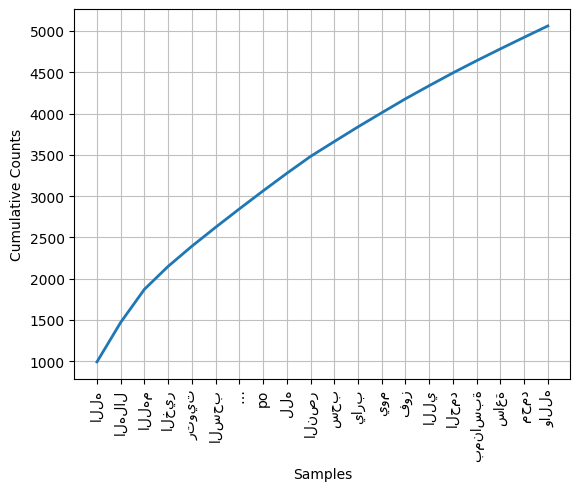

In [44]:
from nltk.probability import FreqDist
from matplotlib import pyplot as plt

text_data = data_positive['tweet preprocessed'].str.cat(sep=' ')
tokens = nltk.tokenize.word_tokenize(text_data)
fdist = FreqDist(tokens)
fdist.plot(20, cumulative=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


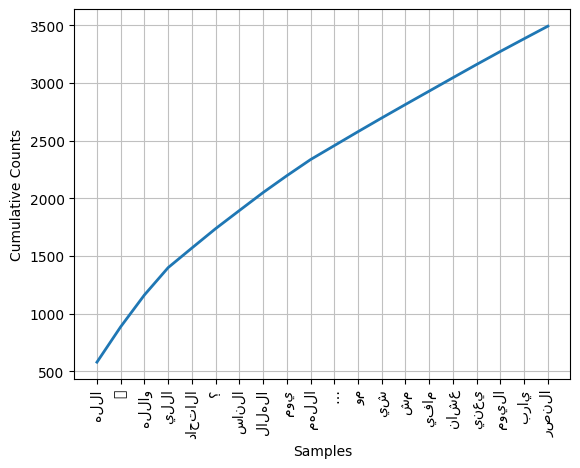

In [45]:
text_data = data_negative['tweet preprocessed'].str.cat(sep=' ')
text_data = text_data[::-1]
tokens = nltk.tokenize.word_tokenize(text_data)
fdist = FreqDist(tokens)
fdist.plot(20, cumulative=True)
plt.show()

In [46]:
pip install wordcloud arabic_reshaper python-bidi matplotlib


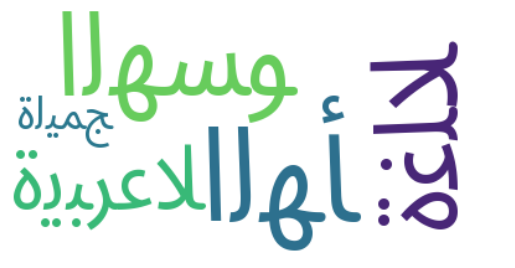

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Your text goes here
text = 'أهلاً وسهلا اللغة العربية جميلة'
text = text[::-1]

# Reshape the text
reshaped_text = arabic_reshaper.reshape(text)

# Use get_display to account for RTL
bidi_text = get_display(reshaped_text)

# Generate the word cloud
wordcloud = WordCloud(font_path='/content/drive/MyDrive/Colab Notebooks/Others/Sentiment Analysis/Noto_Sans_Arabic/static/NotoSansArabic_ExtraCondensed-Regular.ttf', background_color='white').generate(bidi_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['tweet preprocessed'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [49]:
model = LogisticRegression()
model.fit(X_train_vectorized, Y_train)
predictions = model.predict(X_test_vectorized)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1194
           1       0.74      0.69      0.71      1110

    accuracy                           0.73      2304
   macro avg       0.73      0.73      0.73      2304
weighted avg       0.73      0.73      0.73      2304



In [50]:
data = {
    'tweet': [
        'هذا سىء جداً',
        'جميل',
        'رائع يا صديقي',
        'يا حقير',
        'البحرين بلد جميل  يعم فيه السلام',
        'يا جميل',
        'لا يمكنني الإستمرار في هذا العمل لمدة أطول',
        'والنعم فيه رجال طيب الله يكثر من أمثاله',
        'إنها إمرأة بشعة كثيرة الكلام',
        "كس أمك يا خنيث",
        "ما عليك الأمور طيبة",
        'بلد الشعب فيه جداً جاف ولا يجيد التعامل مع السياح',
        'الشعب طيب جداً',
        'لا بأس عليك طهور إن شاء الله ',
        'لا أنصح بشراء هذا المنتج',
        'قل الحمدلله لانك دائمًا لديك أكثر مما تظن',
        'ما أجمل الصمت في القضايا الحساسة, فكم شاهدنا ممن أهلكه كلامه، ولم نرَ قط أحداً بلغنا أنه أهلكه سكوته'
    ]
}

df_test = pd.DataFrame(data)

def predict_sentiment(text):
  text = vectorizer.transform([text])
  prediction =  model.predict(text)
  return 'negative' if prediction == 0 else 'positive'

df_test['sentiment'] = df_test['tweet'].apply(predict_sentiment)
df_test.head(100)

,tweet,sentiment
0,هذا سىء جداً,negative
1,جميل,positive
2,رائع يا صديقي,positive
3,يا حقير,negative
4,البحرين بلد جميل يعم فيه السلام,positive
5,يا جميل,positive
6,لا يمكنني الإستمرار في هذا العمل لمدة أطول,negative
7,والنعم فيه رجال طيب الله يكثر من أمثاله,positive
8,إنها إمرأة بشعة كثيرة الكلام,negative
9,كس أمك يا خنيث,negative


In [51]:
X = df['tweet preprocessed'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = SVC()
model.fit(X_train_vectorized, Y_train)
predictions = model.predict(X_test_vectorized)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1194
           1       0.78      0.70      0.74      1110

    accuracy                           0.76      2304
   macro avg       0.76      0.76      0.76      2304
weighted avg       0.76      0.76      0.76      2304



In [52]:
data = {
    'tweet': [
        'هذا سىء جداً',
        'جميل',
        'رائع يا صديقي',
        'يا حقير',
        'البحرين بلد جميل  يعم فيه السلام',
        'يا جميل',
        'لا يمكنني الإستمرار في هذا العمل لمدة أطول',
        'والنعم فيه رجال طيب الله يكثر من أمثاله',
        'إنها إمرأة بشعة كثيرة الكلام',
        "كس أمك يا خنيث",
        "ما عليك الأمور طيبة",
        'بلد الشعب فيه جداً جاف ولا يجيد التعامل مع السياح',
        'الشعب طيب جداً',
        'لا بأس عليك طهور إن شاء الله ',
        'لا أنصح بشراء هذا المنتج',
        'قل الحمدلله لانك دائمًا لديك أكثر مما تظن',
        'ما أجمل الصمت في القضايا الحساسة, فكم شاهدنا ممن أهلكه كلامه، ولم نرَ قط أحداً بلغنا أنه أهلكه سكوته'
    ]
}

df_test = pd.DataFrame(data)

def predict_sentiment(text):
  text = vectorizer.transform([text])
  prediction =  model.predict(text)
  return 'negative' if prediction == 0 else 'positive'

df_test['tweet preprocessed'] = df_test['tweet'].apply(preprocess)
df_test['sentiment'] = df_test['tweet'].apply(predict_sentiment)
df_test.head(100)

,tweet,tweet preprocessed,sentiment
0,هذا سىء جداً,سىء جداً,negative
1,جميل,جميل,positive
2,رائع يا صديقي,رائع صديقي,positive
3,يا حقير,حقير,negative
4,البحرين بلد جميل يعم فيه السلام,البحرين بلد جميل يعم السلام,positive
5,يا جميل,جميل,positive
6,لا يمكنني الإستمرار في هذا العمل لمدة أطول,يمكنني الإستمرار العمل لمدة أطول,negative
7,والنعم فيه رجال طيب الله يكثر من أمثاله,والنعم رجال طيب الله يكثر أمثاله,positive
8,إنها إمرأة بشعة كثيرة الكلام,إمرأة بشعة كثيرة الكلام,negative
9,كس أمك يا خنيث,كس أمك خنيث,negative


In [53]:
X = df['tweet preprocessed'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

vectorizer = TfidfVectorizer(ngram_range=(1,3))
#vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = SVC()
model.fit(X_train_vectorized, Y_train)
predictions = model.predict(X_test_vectorized)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1194
           1       0.79      0.68      0.73      1110

    accuracy                           0.76      2304
   macro avg       0.76      0.76      0.76      2304
weighted avg       0.76      0.76      0.76      2304



In [54]:
data = {
    'tweet': [
        'هذا سىء جداً',
        'جميل',
        'رائع يا صديقي',
        'يا حقير',
        'البحرين بلد جميل  يعم فيه السلام',
        'يا جميل',
        'لا يمكنني الإستمرار في هذا العمل لمدة أطول',
        'والنعم فيه رجال طيب الله يكثر من أمثاله',
        'إنها إمرأة بشعة كثيرة الكلام',
        "كس أمك يا خنيث",
        "ما عليك الأمور طيبة",
        'بلد الشعب فيه جداً جاف ولا يجيد التعامل مع السياح',
        'الشعب طيب جداً',
        'لا بأس عليك طهور إن شاء الله ',
        'لا أنصح بشراء هذا المنتج',
        'قل الحمدلله لانك دائمًا لديك أكثر مما تظن',
        'ما أجمل الصمت في القضايا الحساسة, فكم شاهدنا ممن أهلكه كلامه، ولم نرَ قط أحداً بلغنا أنه أهلكه سكوته'
    ]
}

df_test = pd.DataFrame(data)

def predict_sentiment(text):
  text = vectorizer.transform([text])
  prediction =  model.predict(text)
  return 'negative' if prediction == 0 else 'positive'

df_test['tweet preprocessed'] = df_test['tweet'].apply(preprocess)
df_test['sentiment'] = df_test['tweet'].apply(predict_sentiment)
df_test.head(100)

,tweet,tweet preprocessed,sentiment
0,هذا سىء جداً,سىء جداً,negative
1,جميل,جميل,positive
2,رائع يا صديقي,رائع صديقي,positive
3,يا حقير,حقير,negative
4,البحرين بلد جميل يعم فيه السلام,البحرين بلد جميل يعم السلام,positive
5,يا جميل,جميل,positive
6,لا يمكنني الإستمرار في هذا العمل لمدة أطول,يمكنني الإستمرار العمل لمدة أطول,negative
7,والنعم فيه رجال طيب الله يكثر من أمثاله,والنعم رجال طيب الله يكثر أمثاله,positive
8,إنها إمرأة بشعة كثيرة الكلام,إمرأة بشعة كثيرة الكلام,negative
9,كس أمك يا خنيث,كس أمك خنيث,negative


In [55]:
X = df['tweet preprocessed'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

vectorizer = TfidfVectorizer(ngram_range=(1,3))
#vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

model = SVC(kernel='sigmoid')
model.fit(X_train_vectorized, Y_train)
predictions = model.predict(X_test_vectorized)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77      1194
           1       0.76      0.70      0.73      1110

    accuracy                           0.75      2304
   macro avg       0.75      0.75      0.75      2304
weighted avg       0.75      0.75      0.75      2304



In [56]:
data = {
    'tweet': [
        'هذا سىء جداً',
        'جميل',
        'رائع يا صديقي',
        'يا حقير',
        'البحرين بلد جميل  يعم فيه السلام',
        'يا جميل',
        'لا يمكنني الإستمرار في هذا العمل لمدة أطول',
        'والنعم فيه رجال طيب الله يكثر من أمثاله',
        'إنها إمرأة بشعة كثيرة الكلام',
        "كس أمك يا خنيث",
        "ما عليك الأمور طيبة",
        'بلد الشعب فيه جداً جاف ولا يجيد التعامل مع السياح',
        'الشعب طيب جداً',
        'لا بأس عليك طهور إن شاء الله ',
        'لا أنصح بشراء هذا المنتج',
        'قل الحمدلله لانك دائمًا لديك أكثر مما تظن',
        'ما أجمل الصمت في القضايا الحساسة, فكم شاهدنا ممن أهلكه كلامه، ولم نرَ قط أحداً بلغنا أنه أهلكه سكوته'
    ]
}

df_test = pd.DataFrame(data)

def predict_sentiment(text):
  text = vectorizer.transform([text])
  prediction =  model.predict(text)
  return 'negative' if prediction == 0 else 'positive'

df_test['tweet preprocessed'] = df_test['tweet'].apply(preprocess)
df_test['sentiment'] = df_test['tweet'].apply(predict_sentiment)
df_test.head(100)

,tweet,tweet preprocessed,sentiment
0,هذا سىء جداً,سىء جداً,negative
1,جميل,جميل,positive
2,رائع يا صديقي,رائع صديقي,positive
3,يا حقير,حقير,negative
4,البحرين بلد جميل يعم فيه السلام,البحرين بلد جميل يعم السلام,positive
5,يا جميل,جميل,positive
6,لا يمكنني الإستمرار في هذا العمل لمدة أطول,يمكنني الإستمرار العمل لمدة أطول,negative
7,والنعم فيه رجال طيب الله يكثر من أمثاله,والنعم رجال طيب الله يكثر أمثاله,positive
8,إنها إمرأة بشعة كثيرة الكلام,إمرأة بشعة كثيرة الكلام,negative
9,كس أمك يا خنيث,كس أمك خنيث,negative


In [57]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Split Data into Train and Validation Sets (80% Train, 20% Test)
X = df['tweet preprocessed'].values
Y = df['sentiment'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
# Create the individual models
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = SVC()

# Create the ensemble model
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')

# Fit the ensemble model to the data
eclf.fit(X_train_vectorized, Y_train)

# Use the ensemble model to make predictions
predictions = eclf.predict(X_test_vectorized)

In [58]:
df.tail()

,sentiment,tweet,tweet preprocessed
11514,1,ربي يسعدنا وياكم 💛,ربي يسعدنا وياكم
11515,1,يتحدثون عن اخلاق حسين ونجوم فرقهم نهاياتهم الر...,يتحدثون اخلاق حسين ونجوم فرقهم نهاياتهم الرياض...
11516,1,صباحكم احتفالية لم تكتمل، وصاحب الاحتفاليه ماك...,صباحكم احتفالية تكتمل وصاحب الاحتفاليه ماكمل ا...
11517,1,قلت لكم سابقا المعيوف عندما تحتاجه لا يخذلك 💙,قلت سابقا المعيوف تحتاجه يخذلك
11518,0,بلد الشعب فيه جداً جاف ولا يجيد التعامل مع السياح,بلد الشعب جداً جاف يجيد التعامل السياح


In [59]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1194
           1       0.78      0.68      0.73      1110

    accuracy                           0.75      2304
   macro avg       0.76      0.75      0.75      2304
weighted avg       0.76      0.75      0.75      2304

